In [1]:
import os
import dota2api
import datetime
import json
import pdb
from time import sleep

In [4]:
#set up dota2api

api = dota2api.Initialise(logging=True)

In [6]:
start_match_seq_num = 1704401237

In [7]:
match_temp = api.get_match_history_by_seq_num(start_match_seq_num-1)

In [9]:
match_temp.keys()

[u'status', u'matches']

In [12]:
match_temp['matches'][0]['match_seq_num']

1704401237

In [13]:
len(match_temp)

2

In [14]:
coll.insert(match_temp)

ObjectId('567270ae22f14a0f2ec02f29')

In [16]:
coll.count()

1

In [19]:
match_temp['status']

1

** How to deal with the status not '1'

    - It looks like all data parsed from api are "1" in status

In [20]:
type(match_temp)

dota2api.src.response.Dota2Dict

In [21]:
type(match_temp['matches'])

list

In [22]:
type(match_temp['status'])

int

In [23]:
len(match_temp['matches'])

100

In [24]:
db.coll.remove()

{u'n': 0, u'ok': 1}

In [26]:
if match_temp['status'] != 1:
    print match_temp['statusDetail']
else:
    for match in match_temp['matches']:
        db.coll.insert(match)

In [27]:
db.coll.count()

100

In [29]:
import datetime

In [30]:
t1 = datetime.datetime.now()

In [31]:
t1

datetime.datetime(2015, 12, 17, 0, 41, 38, 348199)

In [32]:
t2 = datetime.datetime.now()

In [33]:
t2

datetime.datetime(2015, 12, 17, 0, 41, 56, 733514)

In [34]:
t2 - t1

datetime.timedelta(0, 18, 385315)

In [35]:
print str(t2-t1)

0:00:18.385315


In [ ]:
def get_match_history():
    n=0
    start_match_seq_num = 1704401237
    t0 = datetime.datetime.now()
    
    while n < 400:
        if n % 40 ==0:
            num = n+1
            t1 = datetime.datetime.now()
            delta_t = str(t1 - t0)
            print "Process {0} request use time: {1}".format(num, delta_t)
            
        sleep(1.0)
        
        gmh = api.get_match_history_by_seq_num(start_at_match_seq_num=start_match_seq_num,
                                               matches_requested=400)
        
        if gmh['status'] != 1:
            print gmh['statusDetail']
        else:
            for match in gmh['matches']:
                
                match_id = match['match_id']

                if db.coll.find_one({'match_id':match_id}) != None:
#                 logger.debug('Encountered match %s already in database, exiting.' % match_id)
                    print '.'
                    exit(0)

                sleep(1.0)
                
                db.coll.insert(match)
                
        last_match_seq_num = match[-1]['match_seq_num']
        logger.debug('Match_id of last match of GMH query: %s' % last_match_id)
        # We don't want to record the last match twice, so subtract 1
        start_match_seq_num = last_match_seq_num + 1
        n+=1

In [37]:
db.coll.count()

200

In [39]:
match_temp['matches'][0]['match_id']

1928833457

* first two hundreds records are dupblicated

In [49]:
db.coll.count()

1201

In [4]:
pwd

u'/home/hao/Repos/DSI/DOTA2_Recommendation-System'

In [3]:
filename = 'Data_collection/match_history_sample.json'

In [25]:
def check_last_insert_match(file):

    with open(file, 'r') as f:

        current_req_num = 0
        for line in f:
            last = json.loads(line)
            current_req_num += 1

        if current_req_num == 0:
            start_match_seq_num = 1704401237        
        else:
            start_match_seq_num = last['matches'][-1]['match_seq_num'] + 1
        
        return current_req_num, start_match_seq_num

In [26]:
filename1 = 'Data_collection/match_history_t.json'
n, seq = check_last_insert_match(filename1)

In [27]:
n, seq

(0, 1704401237)

In [22]:
start_match_seq_num

1704455240

In [23]:
current_req_num

300

In [20]:
with open(filename, 'r') as f:
    for line in f:
        last = json.loads(line)

In [22]:
start_match_seq_num = last['matches'][-1]['match_seq_num'] + 1

In [23]:
start_match_seq_num

1704455240

In [49]:
date = last['matches'][-1]['start_time']

In [50]:
date_new = date + 1

In [51]:
date, date_new

(1447244263, 1447244264)

In [54]:
print datetime.datetime.fromtimestamp(date)

2015-11-11 04:17:43


In [55]:
print datetime.datetime.fromtimestamp(date_new)

2015-11-11 04:17:44


In [67]:
t=datetime.datetime(2015, 11,11, 14, 11, 11)

In [68]:
print t

2015-11-11 14:11:11


In [37]:
def check_time(t0):
    t1 = datetime.datetime.now()
    delta_t = str(t1 - t0)
    t0 = t1
    n=5
#     n = check_last_insert_match(filename)[0]
    with open('match_history_log_t.txt', mode='a') as check:
        check.write("Current Request: {0}, Current time: {1}, Running time: {2}\n"
                    .format(n, t1, delta_t))

In [30]:
t0 = datetime.datetime.now()

In [39]:
check_time(t0=t0)

In [45]:
t0

datetime.datetime(2015, 12, 22, 10, 24, 2, 420080)

In [47]:
t0 + datetime.timedelta(0,1)

datetime.datetime(2015, 12, 22, 10, 24, 3, 420080)

In [72]:
datetime.datetime.fromtimestamp(1447241070)

datetime.datetime(2015, 11, 11, 3, 24, 30)

In [41]:
n =1
t1=datetime.datetime.now()
delta_t=1
with open('match_history_log_t.txt', mode='a') as check:
    check.write("Current Request: {0}, Current time: {1}, Running time: {2}\n"
                    .format(n, t1, delta_t))

In [73]:
last_match_date = datetime.datetime(2015, 11, 11, 3, 36, 31)
initial_date = datetime.datetime(2015, 11, 11, 0)


In [74]:
initial_date < last_match_date

True

In [80]:
t = initial_date + datetime.timedelta(1,0)

In [81]:
t < last_match_date

False

### Full Data Set
- around 6.8 million matches were parsed, 3.8 million matches from 11/11/2015(majority) to 11/15/2015(small proportion), 1 million matches per day. Then 3 million matches from 11/15/2015 to 12/19/2015 with random selection 1/20 matches.
- The data will be used in this project, first 64,000 requests(lines), which is the matches before 12/16/2015.
- 80G data
- Build a database on current data

### Collect the personal information

In [2]:
hao = 110435207

In [5]:
hao_match_history = api.get_match_history(account_id=hao, min_players=10,matches_requested=500)

In [6]:
hao_match_history.keys()

[u'status', u'total_results', u'matches', u'num_results', u'results_remaining']

In [7]:
hao_match_history['status']

1

In [8]:
hao_match_history['total_results']

271

In [9]:
hao_match_history['num_results']

100

In [10]:
type(hao_match_history['matches'])

list

In [11]:
len(hao_match_history['matches'])

100

In [12]:
hao_match_history['matches'][0]

{u'dire_team_id': 0,
 u'lobby_type': 0,
 u'match_id': 1980394727,
 u'match_seq_num': 1747751775,
 u'players': [{u'account_id': 301152448, u'hero_id': 101, u'player_slot': 0},
  {u'account_id': 110435207, u'hero_id': 30, u'player_slot': 1},
  {u'account_id': 45431908, u'hero_id': 72, u'player_slot': 2},
  {u'account_id': 4294967295, u'hero_id': 18, u'player_slot': 3},
  {u'account_id': 4294967295, u'hero_id': 81, u'player_slot': 4},
  {u'account_id': 283908220, u'hero_id': 77, u'player_slot': 128},
  {u'account_id': 300815921, u'hero_id': 104, u'player_slot': 129},
  {u'account_id': 4294967295, u'hero_id': 60, u'player_slot': 130},
  {u'account_id': 4294967295, u'hero_id': 8, u'player_slot': 131},
  {u'account_id': 193629672, u'hero_id': 73, u'player_slot': 132}],
 u'radiant_team_id': 0,
 u'start_time': 1449297417}

In [16]:
hao_hero_win = []
matches = hao_match_history['matches']
for i in range(100):
    players = matches[i]['players']
    match_id = matches[i]['match_id']
    rad_win = api.get_match_details(match_id=match_id)['radiant_win']
    sleep(1.0)
    for player in players:
        if player['account_id'] == hao:
            hero = player['hero_id']
            if player['player_slot'] < 5:
                hao_hero_win.append((hero,rad_win))
            else:
                hao_hero_win.append((hero,1-rad_win))

In [17]:
len(hao_hero_win)

100

In [64]:
import pandas as pd

df = pd.DataFrame(hao_hero_win)

In [76]:
pwd

u'/home/hao/Repos/DSI/DOTA2_Recommendation-System/notebook'

In [77]:
df.to_csv('../file/Hao_Matches')

In [78]:
df.head(2)

,0,1
0,30,True
1,21,0


In [95]:
df_gpd = df.groupby(0)

In [98]:
df['match_num'] = df_gpd.count()

In [99]:
df

,0,1,match_num
0,30,True,NaN
1,21,0,NaN
2,37,True,1
3,69,0,NaN
4,14,0,1
5,84,False,1
6,33,1,NaN
7,90,1,NaN
8,39,False,1
9,56,False,NaN


In [73]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

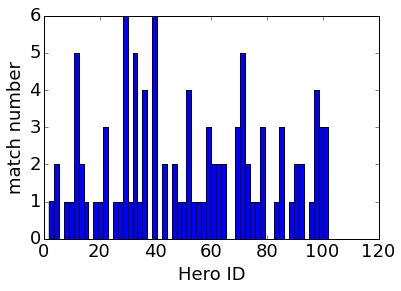

In [94]:
plt.hist(df.iloc[:,0], bins=len(df[0].unique()))

matplotlib.rcParams.update({'font.size': 18})
plt.xlabel('Hero ID')
plt.ylabel('match number')


In [92]:
df[0].unique()

array([ 30,  21,  37,  69,  14,  84,  33,  90,  39,  56,   2,  58,  28,
        62,   5,  85, 102,  40,  98,  51,  44,  71,   4,  22,  73,  78,
        52,  12,  96,  59,  72,  29,  32,  11,  99,  48,  97,  77,  23,
        75,  64,  79,  10,  63,  16,  88,  47,  13,  31,  26,  61,  93,
        18,  60,   8,  34,  54])

In [30]:
from collections import defaultdict

In [48]:
d_list =defaultdict(list)

In [49]:
for x in hao_hero_win:
    hero = x[0]
    d_list[hero].append(x[1])

In [58]:
from copy import copy
d = copy(d_list)

In [59]:
d

defaultdict(<type 'list'>, {2: [0], 4: [True], 5: [0], 8: [1], 10: [1], 11: [0], 12: [True, True, True, 0], 13: [False], 14: [0], 16: [False], 18: [0], 21: [0], 22: [False, False], 23: [1], 26: [True], 28: [False], 29: [True], 30: [True, 0, 0, True, 1], 31: [1], 32: [1, False, True], 33: [1, 0], 34: [False], 37: [True, True, False, True], 39: [False], 40: [0, 0, False, True, False], 44: [0, False], 47: [True, False], 48: [1], 51: [False], 52: [True, True, 1, True], 54: [False], 56: [False], 58: [0], 59: [0, 0, False], 60: [True], 61: [1], 62: [0], 63: [1], 64: [1, 1], 69: [0, 0, 1], 71: [0, True], 72: [1, 0, True], 73: [True, False], 75: [0], 77: [True], 78: [1, 0], 79: [True], 84: [False], 85: [True, 0, False], 88: [False], 90: [1, True], 93: [0, False], 96: [False], 97: [1], 98: [False, True, False], 99: [True, False, False], 102: [True, 0, 0]})

In [60]:
for k,v in d.iteritems():
    d[k] = float(sum(v))/len(v)

In [61]:
d

defaultdict(<type 'list'>, {2: 0.0, 4: 1.0, 5: 0.0, 8: 1.0, 10: 1.0, 11: 0.0, 12: 0.75, 13: 0.0, 14: 0.0, 16: 0.0, 18: 0.0, 21: 0.0, 22: 0.0, 23: 1.0, 26: 1.0, 28: 0.0, 29: 1.0, 30: 0.6, 31: 1.0, 32: 0.6666666666666666, 33: 0.5, 34: 0.0, 37: 0.75, 39: 0.0, 40: 0.2, 44: 0.0, 47: 0.5, 48: 1.0, 51: 0.0, 52: 1.0, 54: 0.0, 56: 0.0, 58: 0.0, 59: 0.0, 60: 1.0, 61: 1.0, 62: 0.0, 63: 1.0, 64: 1.0, 69: 0.3333333333333333, 71: 0.5, 72: 0.6666666666666666, 73: 0.5, 75: 0.0, 77: 1.0, 78: 0.5, 79: 1.0, 84: 0.0, 85: 0.3333333333333333, 88: 0.0, 90: 1.0, 93: 0.0, 96: 0.0, 97: 1.0, 98: 0.3333333333333333, 99: 0.3333333333333333, 102: 0.3333333333333333})

* Use api.get_match_history to get a player's most recent 100 games
* account_id 4294967295 is probably for all the user have privacy setting

In [18]:
api.get_match_details(match_id=hao_match_history['matches'][1]['match_id'])

{u'barracks_status_dire': 48,
 u'barracks_status_radiant': 63,
 u'cluster': 122,
 u'cluster_name': u'US East',
 u'duration': 2427,
 u'engine': 1,
 u'first_blood_time': 110,
 u'game_mode': 5,
 u'game_mode_name': u'All Random',
 u'human_players': 10,
 u'leagueid': 0,
 u'lobby_name': u'Public matchmaking',
 u'lobby_type': 0,
 u'match_id': 1980311745,
 u'match_seq_num': 1747682422,
 u'negative_votes': 0,
 u'players': [{u'ability_upgrades': [{u'ability': 5190,
     u'level': 1,
     u'time': 197},
    {u'ability': 5191, u'level': 2, u'time': 234},
    {u'ability': 5190, u'level': 3, u'time': 289},
    {u'ability': 5192, u'level': 4, u'time': 339},
    {u'ability': 5190, u'level': 5, u'time': 430},
    {u'ability': 5193, u'level': 6, u'time': 489},
    {u'ability': 5190, u'level': 7, u'time': 554},
    {u'ability': 5191, u'level': 8, u'time': 651},
    {u'ability': 5191, u'level': 9, u'time': 882},
    {u'ability': 5191, u'level': 10, u'time': 1024},
    {u'ability': 5193, u'level': 11, u'ti